In [3]:
import pandas as pd
from bs4 import BeautifulSoup
import requests
import xarray as xr
import cfgrib
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import plotly.express as px
import glob
#pd.set_option("max_columns", None)

In [2]:
# r = requests.get('https://coastwatch.pfeg.noaa.gov/erddap/griddap/erdlasFn500mb.htmlTable?z_mean%5B(2022-05-01T00:00:00Z):1:(2022-09-30T00:00:00Z)%5D%5B(32):1:(42)%5D%5B(235):1:(245)%5D')

# print(r)
# page = BeautifulSoup(r.content, 'html.parser')

In [3]:
# table = page.find('table', {'class':'erd commonBGColor nowrap'})
# rows = table.find_all('tr')
# times = []
# lat = []
# long = []
# geop_ht = []
# for row in rows[2:]:
#     times.append(row.find('td').get_text().split('\n')[0])
#     lat.append(row.find('td').get_text().split('\n')[1])
#     long.append(row.find('td').get_text().split('\n')[2])
#     geop_ht.append(row.find('td').get_text().split('\n')[3])

# df = pd.DataFrame({'time':times, 'latitude':lat, 'longitude':long, 'geopotential_height':geop_ht})
# df

In [4]:
# r =requests.get('https://coastwatch.pfeg.noaa.gov/erddap/griddap/erdlasFnPres6.htmlTable?p_msl%5B(2022-05-01T18:00:00Z):4:(2022-09-30T18:00:00Z)%5D%5B(32):1:(42)%5D%5B(235):1:(245)%5D')
# print(r)
# page = BeautifulSoup(r.content, 'html.parser')

In [5]:
# table = page.find('table', {'class':'erd commonBGColor nowrap'})
# rows = table.find_all('tr')
# times = []
# lat = []
# long = []
# slp = []
# for row in rows[2:]:
#     times.append(row.find('td').get_text().split('\n')[0])
#     lat.append(row.find('td').get_text().split('\n')[1])
#     long.append(row.find('td').get_text().split('\n')[2])
#     slp.append(row.find('td').get_text().split('\n')[3])

# df2 = pd.DataFrame({'time':times, 'latitude':lat, 'longitude':long, 'sea_level_pressure':slp})
# df2

In [4]:
# ds = xr.open_dataset("adaptor.mars.internal-1679413097.747003-12780-2-c6abee15-c5c4-4290-9ee2-6f4e32413b8e.grib"
#                      , engine='cfgrib')

# 1000 hPa level
#ds = cfgrib.open_dataset("adaptor.mars.internal-1679413097.747003-12780-2-c6abee15-c5c4-4290-9ee2-6f4e32413b8e.grib")

# 300, 500, 700 hPa levels
ds = cfgrib.open_dataset("adaptor.mars.internal-1680573773.6689622-24865-2-52815289-d6bf-4ea4-beb8-f4a63d9b925b.grib")

In [5]:
#ds

In [6]:
for v in ds:
    print("{}, {}, {}".format(v, ds[v].attrs["long_name"], ds[v].attrs["units"]))

z, Geopotential, m**2 s**-2
pv, Potential vorticity, K m**2 kg**-1 s**-1
r, Relative humidity, %
q, Specific humidity, kg kg**-1
u, U component of wind, m s**-1
v, V component of wind, m s**-1
vo, Vorticity (relative), s**-1


In [9]:
df = ds.to_dataframe()

In [10]:
#df.to_csv('ERA5_Calif_00_22_1000hPa.csv', index=False)

In [11]:
df['month'] = df['valid_time'].dt.month
df['year'] = df['valid_time'].dt.year

In [12]:
# mnth_mean = df.groupby('month').mean()
# sns.barplot(x=mnth_mean.index, y='t', data=mnth_mean)
# plt.show()

In [13]:
df

number   step  \
time                isobaricInhPa latitude longitude                  
2005-05-01 04:00:00 700.0         42.0     -122.00         0 0 days   
                                           -121.75         0 0 days   
                                           -121.50         0 0 days   
                                           -121.25         0 0 days   
                                           -121.00         0 0 days   
...                                                      ...    ...   
2022-09-30 16:00:00 300.0         32.0     -116.00         0 0 days   
                                           -115.75         0 0 days   
                                           -115.50         0 0 days   
                                           -115.25         0 0 days   
                                           -115.00         0 0 days   

                                                              valid_time  \
time                isobaricInhPa latitude longitude                       
2005-05-01 04:00:00 700.0         42.0     -122.00   2005-05-01 04:00:00   
                                           -121.75   2005-05-01 04:00:00   
                                           -121.50   2005-05-01 04:00:00   
                                           -121.25   2005-05-01 04:00:00   
                                           -121.00   2005-05-01 04:00:00   
...                                                                  ...   
2022-09-30 16:00:00 300.0         32.0     -116.00   2022-09-30 16:00:00   
                                           -115.75   2022-09-30 16:00:00   
                                           -115.50   2022-09-30 16:00:00   
                                           -115.25   2022-09-30 16:00:00   
                                           -115.00   2022-09-30 16:00:00   

                                                               z  \
time                isobaricInhPa latitude longitude               
2005-05-01 04:00:00 700.0         42.0     -122.00    29999.4375   
                                           -121.75    30007.9375   
                                           -121.50    30025.4375   
                                           -121.25    30037.6875   
                                           -121.00    30045.1875   
...                                                          ...   
2022-09-30 16:00:00 300.0         32.0     -116.00    94118.7500   
                                           -115.75    94110.2500   
                                           -115.50    94091.7500   
                                           -115.25    94068.7500   
                                           -115.00    94057.2500   

                                                                pv          r  \
time                isobaricInhPa latitude longitude                            
2005-05-01 04:00:00 700.0         42.0     -122.00    5.207694e-07  86.590126   
                                           -121.75    5.803740e-07  83.058876   
                                           -121.50    4.760659e-07  84.187782   
                                           -121.25    3.419555e-07  84.535439   
                                           -121.00    2.823508e-07  75.754189   
...                                                            ...        ...   
2022-09-30 16:00:00 300.0         32.0     -116.00    3.999130e-07  18.250128   
                                           -115.75    4.660369e-07  16.980597   
                                           -115.50    4.907170e-07  15.918097   
                                           -115.25    4.665026e-07  15.484503   
                                           -115.00    4.678996e-07  16.382940   

                                                             q         u  \
time                isobaricInhPa latitude longitude                       
2005-05-01 04:00:00 700.0         42.0     -122.00

In [14]:
agg_press = df.groupby(['time', 'latitude', 'longitude']).mean()
agg_time = agg_press.groupby(['latitude', 'longitude']).mean()


C:\Users\jedbe\AppData\Local\Temp\ipykernel_20392\1203166997.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  agg_press = df.groupby(['time', 'latitude', 'longitude']).mean()


In [15]:
# This finds "optimal" number of clusters
wss = []
for i in range(10):
    kmeans = KMeans(n_clusters=i+1, random_state=0, 
                    n_init=10).fit(agg_time.reset_index().drop(['latitude', 'longitude'], axis=1))
    wss.append(kmeans.inertia_)

pct_dec = []
for i in range(len(wss)-1):
    pct_dec.append((wss[i+1]-wss[i])/wss[i])

print(wss)
print(pct_dec)
# Performance stops improving significantly around 6-7 clusters

c:\Python\envs\eeps1720_venv\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(
c:\Python\envs\eeps1720_venv\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(
c:\Python\envs\eeps1720_venv\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(
c:\Python\envs\eeps1720_venv\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memor

[65000667.480995916, 16977198.635213755, 7735230.91964287, 4474886.379777196, 2935301.5999757126, 2088163.1117740306, 1566224.8880306238, 1229530.6788286418, 975354.6894239623, 794091.285970835]
[-0.7388150107815841, -0.5443753067953971, -0.4214928518276481, -0.3440500270038452, -0.28860355890130385, -0.24995088784035951, -0.21497181648373778, -0.2067260246379779, -0.18584357610479132]


In [16]:
kmeans = KMeans(n_clusters=6, random_state=0, 
                    n_init=10).fit(agg_time.reset_index().drop(['latitude', 'longitude'], axis=1))

c:\Python\envs\eeps1720_venv\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(


In [17]:
kmeans.labels_
kmeans.feature_names_in_

array(['number', 'z', 'pv', 'r', 'q', 'u', 'v', 'vo', 'month', 'year'],
      dtype=object)

In [18]:
agg_time['cluster'] = kmeans.labels_

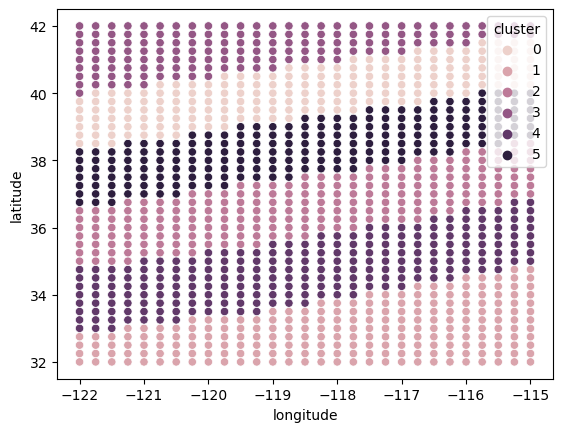

In [19]:
sns.scatterplot(x='longitude', y='latitude', data=agg_time, hue='cluster')
plt.show()

In [20]:
# fig = px.scatter(agg_time.reset_index(), x='longitude', y='latitude', color='cluster', hover_data=['cluster'])
# fig.show()

In [21]:
urls = glob.glob("ERA5_land_data/*.grib")

In [22]:
dfs = []
for url in urls:
    ds = cfgrib.open_dataset(url)
    dfs.append(ds.to_dataframe())

temp_df = pd.concat(dfs)


skipping variable: paramId==139 shortName='stl1'
Traceback (most recent call last):
  File "c:\Python\envs\eeps1720_venv\lib\site-packages\cfgrib\dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "c:\Python\envs\eeps1720_venv\lib\site-packages\cfgrib\dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='time' value=Variable(dimensions=('time',), data=array([1177977600, 1178064000, 1178150400, 1178236800, 1178323200,
       1178409600, 1178496000, 1178582400, 1178668800, 1178755200,
       1178841600, 1178928000, 1179014400, 1179100800, 1179187200,
       1179273600, 1179360000, 1179446400, 1179532800, 1179619200,
       1179705600, 1179792000, 1179878400, 1179964800, 1180051200,
       1180137600, 1180224000, 1180310400, 1180396800, 1180483200,
       1180569600])) new_value=Variable(dimensions=('time',), data=array([1177992000, 1178035200, 1178078400

In [23]:
# 18% null values, should we try to interpolate with long and lat?
# Need to interpolate anyway to get 0.25 resolution instead of 0.1
# temp_df[temp_df['t2m'].isnull()]

In [24]:
temp_df['month'] = temp_df['valid_time'].dt.month
temp_df['year'] = temp_df['valid_time'].dt.year

In [25]:
#dup = temp_df[temp_df.duplicated()]

In [26]:
#dup.groupby(['year', 'month']).count()

In [27]:
ridf = temp_df.reset_index()
ridf.drop_duplicates(inplace=True)

In [28]:
dflr = ridf.groupby(['latitude', 'longitude', 'time']).mean().reset_index()

C:\Users\jedbe\AppData\Local\Temp\ipykernel_20392\3532643334.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  dflr = ridf.groupby(['latitude', 'longitude', 'time']).mean().reset_index()


In [29]:
dflr['lat'] = dflr['latitude'].round(decimals=1).astype('str')
dflr['long'] = dflr['longitude'].round(decimals=1).astype('str')


In [30]:
lat_lr = dflr[(dflr['lat'].str[-1]=='0') | (dflr['lat'].str[-1]=='2') | (dflr['lat'].str[-1]=='3') |\
     (dflr['lat'].str[-1]=='5') | (dflr['lat'].str[-1]=='7') | (dflr['lat'].str[-1]=='8')]

lr = lat_lr[(lat_lr['long'].str[-1]=='0') | (lat_lr['long'].str[-1]=='2') | (lat_lr['long'].str[-1]=='3') |\
     (lat_lr['long'].str[-1]=='5') | (lat_lr['long'].str[-1]=='7') | (lat_lr['long'].str[-1]=='8')]

In [31]:
# time_vals = sorted(set(lr['time'].values))
# lat_vals = sorted(set(lr['latitude'].round(decimals=1).values))
# long_vals = sorted(set(lr['longitude'].round(decimals=1).values))

In [32]:
# Come back to this, for now assume .2 = .25 and .7 = .75 
# for t in time_vals:
#     for lat in lat_vals:
#         for long in long_vals:


In [33]:
lr['latitude'] = lr['latitude'].round(decimals=1)
lr['longitude'] = lr['longitude'].round(decimals=1)
df27 = lr[(lr['lat'].str[-1]=='2') | (lr['lat'].str[-1]=='7')|(lr['long'].str[-1]=='2') | (lr['long'].str[-1]=='7')]

C:\Users\jedbe\AppData\Local\Temp\ipykernel_20392\1646080430.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lr['latitude'] = lr['latitude'].round(decimals=1)
C:\Users\jedbe\AppData\Local\Temp\ipykernel_20392\1646080430.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lr['longitude'] = lr['longitude'].round(decimals=1)


In [34]:
lats = []
longs = []
for index, item in df27.iterrows():
    if (item['lat'][-1] == '2') or item['lat'][-1] == '7':
        lats.append(item['latitude'] + 0.05)
    else:
        lats.append(item['latitude'])

    if (item['long'][-1] == '2') or item['long'][-1] == '7':
        longs.append(item['longitude'] - 0.05)
    else:
        longs.append(item['longitude'])
    

df27['latitude'] = lats
df27['longitude'] = longs


C:\Users\jedbe\AppData\Local\Temp\ipykernel_20392\632711543.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df27['latitude'] = lats
C:\Users\jedbe\AppData\Local\Temp\ipykernel_20392\632711543.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df27['longitude'] = longs


In [35]:
lr = lr[(lr['long'].str[-1]=='0') | (lr['long'].str[-1]=='5') | (lr['lat'].str[-1]=='0') | \
     (lr['lat'].str[-1]=='5')]

lr = pd.concat([lr, df27])

In [52]:
df.reset_index(inplace=True)
#df['time'] = df['time'].astype('datetime64[ns]')    
new_df = df.groupby(['latitude', 'longitude','isobaricInhPa', df.time.dt.date]).mean()

C:\Users\jedbe\AppData\Local\Temp\ipykernel_20392\2240504277.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  new_df = df.groupby(['latitude', 'longitude','isobaricInhPa', df.time.dt.date]).mean()


In [53]:
new_df.reset_index(inplace=True)

In [54]:
new_df['time'] = new_df['time'].astype('datetime64[ns]')

In [55]:
final_df = pd.merge(lr, new_df, how='inner', on=['latitude', 'longitude', 'time'])
final_df

,latitude,longitude,time,number_x,surface,t2m,month_x,year_x,lat,long,...,number_y,z,pv,r,q,u,v,vo,month_y,year_y
0,32.0,-122.00,2007-05-01,0.0,0.0,NaN,5.0,2007.0,32.0,-122.0,...,0.0,91941.906250,7.750018e-07,43.109970,0.000074,7.421150,-1.193283,6.506173e-05,5.0,2007.0
1,32.0,-122.00,2007-05-01,0.0,0.0,NaN,5.0,2007.0,32.0,-122.0,...,0.0,56220.171875,5.487914e-07,15.792196,0.000298,2.247208,1.590576,3.837515e-05,5.0,2007.0
2,32.0,-122.00,2007-05-01,0.0,0.0,NaN,5.0,2007.0,32.0,-122.0,...,0.0,30511.916016,-9.276846e-09,37.751266,0.002529,-1.294067,1.838409,-5.653896e-05,5.0,2007.0
3,32.0,-122.00,2007-05-02,0.0,0.0,NaN,5.0,2007.0,32.0,-122.0,...,0.0,92903.531250,9.756377e-08,70.254654,0.000180,29.241196,-5.397659,-4.725147e-05,5.0,2007.0
4,32.0,-122.00,2007-05-02,0.0,0.0,NaN,5.0,2007.0,32.0,-122.0,...,0.0,56563.648438,3.860841e-07,27.884769,0.000812,19.150963,-0.473503,-4.102476e-06,5.0,2007.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8635702,42.0,-115.25,2022-09-29,0.0,0.0,289.340210,9.0,2022.0,42.0,-115.2,...,0.0,57051.949219,4.901931e-07,50.628807,0.001340,14.357346,10.184456,2.254965e-07,9.0,2022.0
8635703,42.0,-115.25,2022-09-29,0.0,0.0,289.340210,9.0,2022.0,42.0,-115.2,...,0.0,30897.341797,-9.894575e-08,38.107201,0.003392,8.387283,7.058807,-1.492153e-05,9.0,2022.0
8635704,42.0,-115.25,2022-09-30,0.0,0.0,282.841797,9.0,2022.0,42.0,-115.2,...,0.0,92017.906250,6.210613e-06,15.729435,0.000043,24.357742,-12.420189,2.062999e-04,9.0,2022.0
8635705,42.0,-115.25,2022-09-30,0.0,0.0,282.841797,9.0,2022.0,42.0,-115.2,...,0.0,56234.980469,6.898854e-07,35.941715,0.000698,17.285492,-1.963379,1.036697e-04,9.0,2022.0


In [59]:
final_df = final_df[['latitude', 'longitude', 'time', 't2m', 'isobaricInhPa', 'z',
       'pv', 'r', 'q', 'u', 'v', 'vo', 'month_y', 'year_y']]

In [60]:
final_df.to_csv('heat_wave_data.csv', index=False)

In [38]:
# TODO: 
# 1) Interpolate temperature data for every 0.25 degrees -- come back to at end
# 2) Interpolate missing temperature data from surrounding values -- come back if relevant
# 3) Merge data frames -- check
# 4) Cluster based on all variables
# 5) Define heatwave rows
# 6) Use model to classify heatwave in each cluser